In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.preprocessing import LabelEncoder

import os
import matplotlib.image as mpimg

In [ ]:
# Define data directory and classes
data_dir = '/content/drive/MyDrive/Final_Dataset_LC'
classes = os.listdir(data_dir)
classes

['lung_aca', 'lung_scc', 'lung_n']

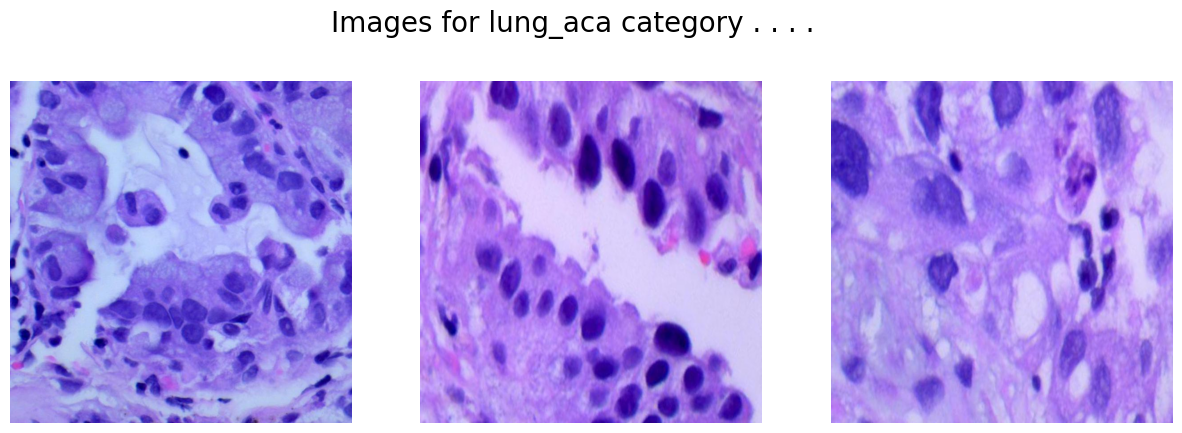

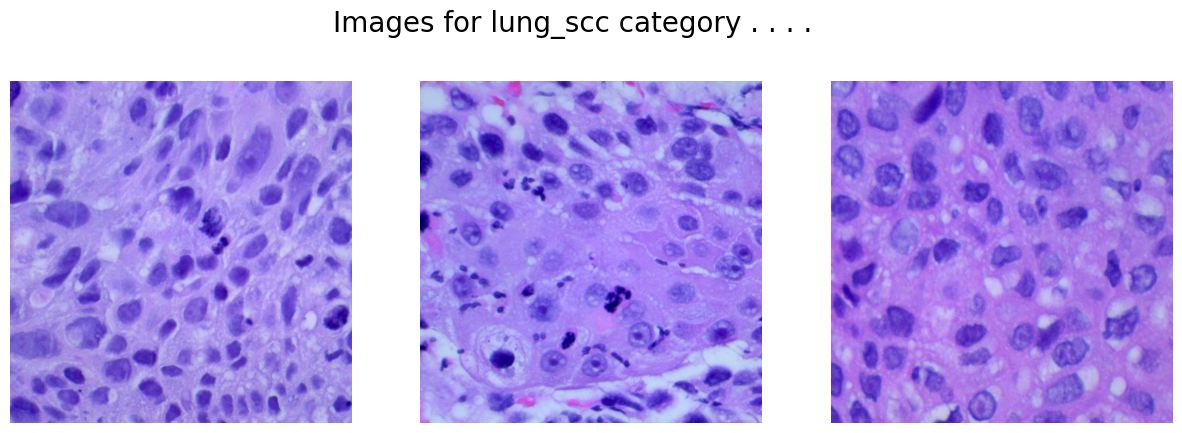

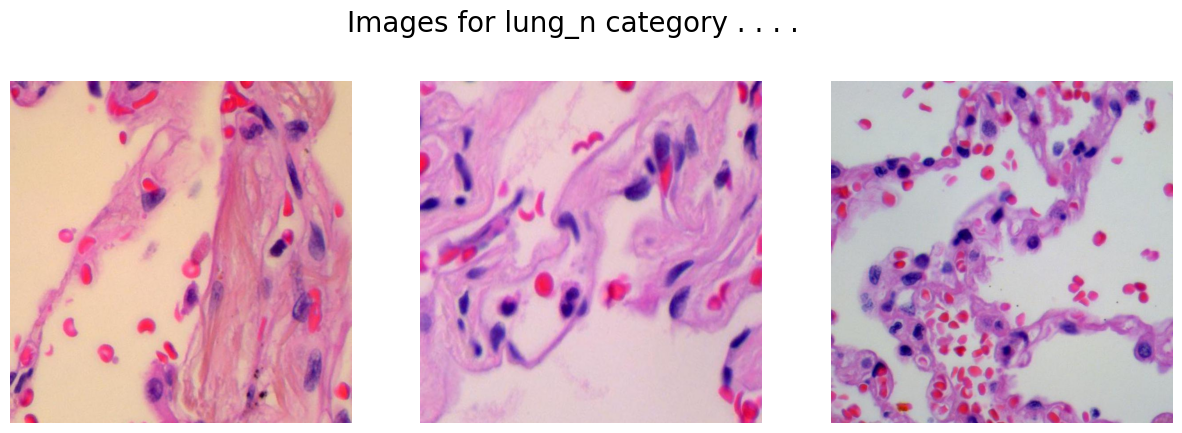

In [ ]:
path = '/content/drive/MyDrive/Final_Dataset_LC'

for cat in classes:
	image_dir = f'{path}/{cat}'
	images = os.listdir(image_dir)

	fig, ax = plt.subplots(1, 3, figsize=(15, 5))
	fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

	for i in range(3):
		k = np.random.randint(0, len(images))
		img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
		ax[i].imshow(img)
		ax[i].axis('off')
	plt.show()


In [ ]:
# Parameters
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
# Load and preprocess the data
X = []
Y = []

In [ ]:
for i, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        img = keras.preprocessing.image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255.0  # Normalize pixel values
        X.append(img_array)
        Y.append(class_name)

X = np.array(X)
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)
Y_one_hot = keras.utils.to_categorical(Y_encoded, num_classes=len(classes))

In [ ]:
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_one_hot, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_val.shape)

(1542, 128, 128, 3) (386, 128, 128, 3)


In [ ]:
# Create a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

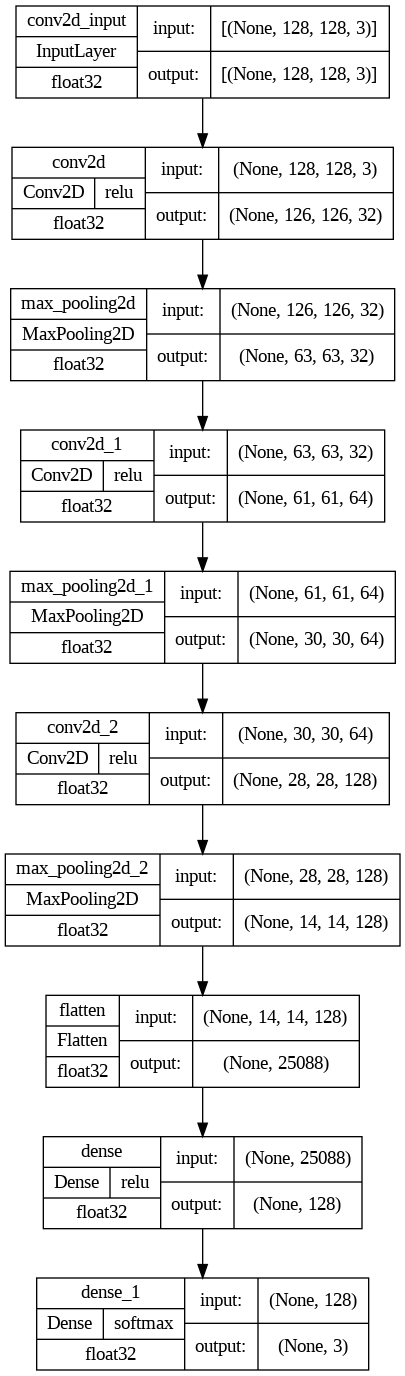

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, Y_val))

Epoch 1/10
49/49 [==============================] - 53s 1s/step - loss: 0.8312 - accuracy: 0.6667 - val_loss: 0.4435 - val_accuracy: 0.7409
Epoch 2/10
49/49 [==============================] - 52s 1s/step - loss: 0.4916 - accuracy: 0.7691 - val_loss: 0.4011 - val_accuracy: 0.8368
Epoch 3/10
49/49 [==============================] - 50s 1s/step - loss: 0.4336 - accuracy: 0.8126 - val_loss: 0.3664 - val_accuracy: 0.8575
Epoch 4/10
49/49 [==============================] - 52s 1s/step - loss: 0.3835 - accuracy: 0.8495 - val_loss: 0.3433 - val_accuracy: 0.8886
Epoch 5/10
49/49 [==============================] - 52s 1s/step - loss: 0.3458 - accuracy: 0.8560 - val_loss: 0.5513 - val_accuracy: 0.8368
Epoch 6/10
49/49 [==============================] - 50s 1s/step - loss: 0.3292 - accuracy: 0.8567 - val_loss: 0.3304 - val_accuracy: 0.8808
Epoch 7/10
49/49 [==============================] - 52s 1s/step - loss: 0.2810 - accuracy: 0.8774 - val_loss: 0.2957 - val_accuracy: 0.8782
Epoch 8/10
49/49 [==

In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, Y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Classifiction accuracy on validation data: {accuracy:.4f}')

13/13 [==============================] - 3s 219ms/step - loss: 0.2753 - accuracy: 0.9093
Validation loss: 0.2753
Classifiction accuracy on validation data: 0.9093


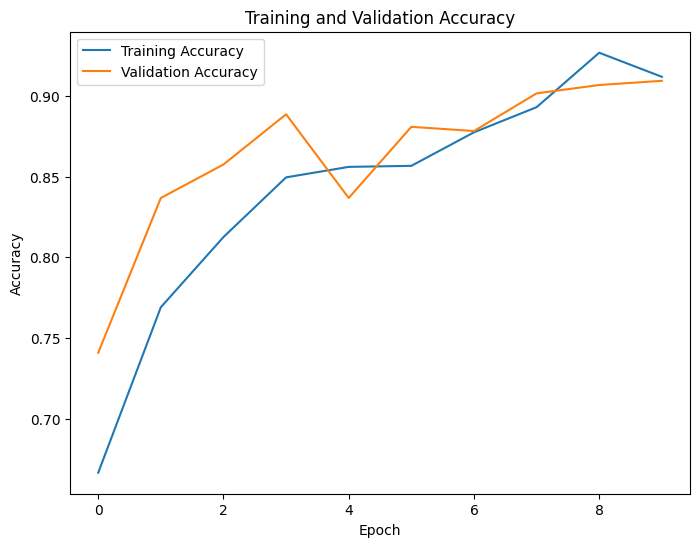

In [ ]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(8, 6))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
# Save the model to a file
model_path = 'Lung_Cancer_CNN_model.h5'
model.save(model_path)
print(f"Model saved to path: {model_path}")

Model saved to path: Lung_Cancer_CNN_model.h5


1/1 [==============================] - 0s 144ms/step


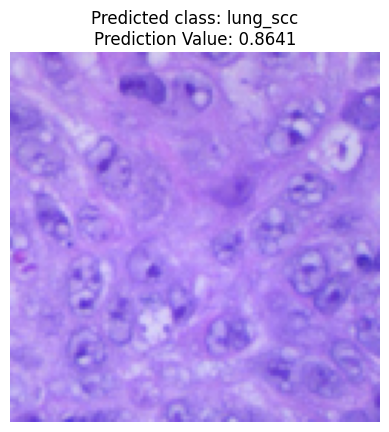

In [ ]:
import os
import random
from tensorflow import keras
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the folder containing the images you want to predict
predict_folder = '/content/drive/MyDrive/Final_Dataset_LC'  # Replace with the actual path

# List the available classes (assuming the folder structure reflects class labels)
classes = os.listdir(predict_folder)

# If the order of classes is different from the model, define it manually
classes = ['lung_acc', 'lung_n', 'lung_scc']

# Load your trained model
model = keras.models.load_model('Lung_Cancer_CNN_model.h5')  # Replace with the actual path to your model

# Randomly select an image file from the folder
class_label = random.choice(classes)
class_folder = os.path.join(predict_folder, class_label)
image_files = os.listdir(class_folder)
image_file = random.choice(image_files)
image_path = os.path.join(class_folder, image_file)

# Load and preprocess the selected image
IMG_SIZE = 128  # Change this to match the input size of your model
img = Image.open(image_path)
img = img.resize((IMG_SIZE, IMG_SIZE))
img = np.asarray(img) / 255.0  # Normalize the pixel values
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make predictions using the model
predictions = model.predict(img)

# Get the predicted class
predicted_class_index = np.argmax(predictions)
predicted_class = classes[predicted_class_index]

# Get the prediction value
prediction_value = predictions[0][predicted_class_index]

# Display the image, predicted class, and prediction value
plt.imshow(np.squeeze(img))
plt.title(f"Predicted class: {predicted_class}\nPrediction Value: {prediction_value:.4f}")
plt.axis('off')
plt.show()


In [ ]:
print(classes)

['lung_acc', 'lung_n', 'lung_scc']


Just for checking


In [ ]:
from tensorflow import keras

# Load your trained model
model = keras.models.load_model('Lung_Cancer_CNN_model.h5')  # Replace with the actual path to your model file


In [ ]:
print(classes)


['lung_acc', 'lung_n', 'lung_scc']


1/1 [==============================] - 0s 86ms/step


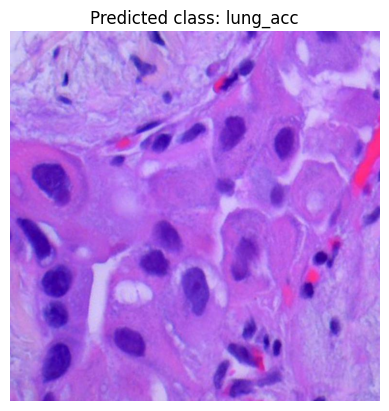

In [ ]:
from PIL import Image
import numpy as np

# Load the image
image_path = '/content/drive/MyDrive/Final_Dataset_LC/lung_aca/lungaca1.jpeg'  # Replace with the actual image file path
img = Image.open(image_path)

classes = ['lung_acc', 'lung_n', 'lung_scc']

# Preprocess the image
IMG_SIZE = 128  # Change this to match the input size of your model
img = img.resize((IMG_SIZE, IMG_SIZE))
img = np.asarray(img) / 255.0  # Normalize the pixel values
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make predictions using the model
predictions = model.predict(img)

# Get the predicted class and probability
predicted_class_index = np.argmax(predictions)
predicted_class = classes[predicted_class_index]
predicted_probability = predictions[0][predicted_class_index]

# Display the image
plt.figure()
plt.imshow(np.asarray(Image.open(image_path)))
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()


